Step 1: Import the necessary libraries

In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Load dataset

In [447]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/invi/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [448]:
# Load dataset
dt = pd.read_csv('/Users/invi/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1/Titanic-Dataset.csv')
dt.info()
dt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 3: Check for Null values

In [449]:
# Check NaN (Dropping or replacing)
print(dt.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Step 4: Data Cleaning

In [450]:
# Data cleaning
dt = dt.drop(columns=['Name', 'Cabin', 'PassengerId'])
dt['Embarked'] = dt['Embarked'].fillna(value=0)
dt['Age'] = dt['Age'].fillna(value=dt['Age'].median())

print(dt.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


Step 5: Ticket Feature engineering

In [451]:
# Making changes to Ticket feature
dt['Group_count'] = dt.groupby('Ticket')['Ticket'].transform('count')
dt = dt.drop(columns=['Ticket'])
dt

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Group_count
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1
887,1,1,female,19.0,0,0,30.0000,S,1
888,0,3,female,28.0,1,2,23.4500,S,2
889,1,1,male,26.0,0,0,30.0000,C,1


Step 6: One Hot Encoding

In [452]:
# One-Hot encoding
dt = pd.get_dummies(dt, drop_first=True)
# warning occurs because pandas is planning a change in how it automatically “downcasts” data types during replacement operations.
dt.replace({True: 1, False: 0}, inplace=True)
dt

/var/folders/8_/g5skmwpj36d4g7b3fcvrjccw0000gn/T/ipykernel_6787/3619033949.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt.replace({True: 1, False: 0}, inplace=True)


,Survived,Pclass,Age,SibSp,Parch,Fare,Group_count,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,2,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,2,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,1,0,0


Step 7: Correlation

             Survived    Pclass       Age     SibSp     Parch      Fare  \
Survived     1.000000 -0.338481 -0.064910 -0.035322  0.081629  0.257307   
Pclass      -0.338481  1.000000 -0.339898  0.083081  0.018443 -0.549500   
Age         -0.064910 -0.339898  1.000000 -0.233296 -0.172482  0.096688   
SibSp       -0.035322  0.083081 -0.233296  1.000000  0.414838  0.159651   
Parch        0.081629  0.018443 -0.172482  0.414838  1.000000  0.216225   
Fare         0.257307 -0.549500  0.096688  0.159651  0.216225  1.000000   
Group_count  0.038247 -0.002633 -0.218669  0.661622  0.593076  0.345541   
Sex_male    -0.543351  0.131900  0.081163 -0.114631 -0.245489 -0.182333   
Embarked_C   0.168240 -0.243292  0.030248 -0.059528 -0.011069  0.269335   
Embarked_Q   0.003650  0.221009 -0.031415 -0.026354 -0.081228 -0.117216   
Embarked_S  -0.155660  0.081720 -0.014665  0.070941  0.063036 -0.166603   

             Group_count  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
Survived        0.038247 -

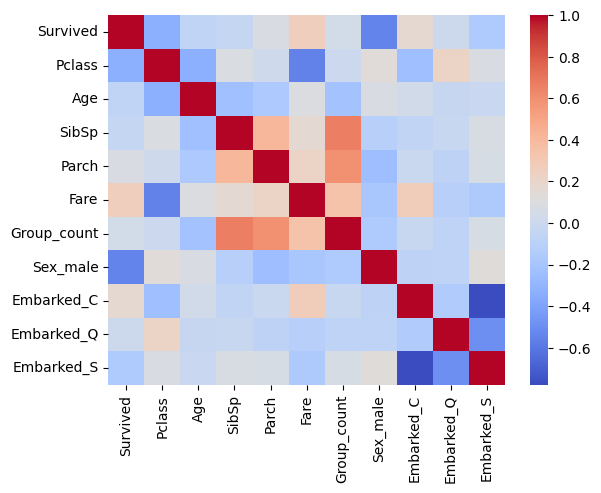

In [453]:

# Correlation heatmap
dt_corr = dt.corr()
print(dt_corr)
sns.heatmap(dt_corr, cmap='coolwarm')
plt.show()

In [454]:
#Sibsp is highly correlated with Group_count
dt = dt.drop(columns=['SibSp'])

Step 8: Standarslisation

In [455]:
# Standardization
scale = ['Age', 'Fare']
for i in scale:
    dt[i] = (dt[i] - dt[i].mean()) / dt[i].std()

Step 9: Data Splitting

In [456]:

# Splitting data
target_column = 'Survived'  # Replace with your actual target variable
shuffled_indices = np.random.permutation(len(dt))
dt_shuffled = dt.iloc[shuffled_indices]

# Define the split ratio
split_ratio = 0.8
split_index = int(len(dt) * split_ratio)

# Split the data
train_data = dt_shuffled.iloc[:split_index]
test_data = dt_shuffled.iloc[split_index:]

# Separate features and target variable
x_train = train_data.drop(target_column, axis=1)
y_train = train_data[target_column].values.reshape(-1, 1)  # Reshape for consistency
x_test = test_data.drop(target_column, axis=1)
y_test = test_data[target_column].values.reshape(-1, 1)  # Reshape for consistency

# Check sizes
print("Training set size:", x_train.shape[0])
print("Testing set size:", x_test.shape[0])


Training set size: 712
Testing set size: 179


Step 10: Logistic Regression model

In [457]:
# Logistic Regression Model Parameters
n_samples, n_features = x_train.shape
weights = np.zeros((n_features, 1))
learning_rate = 0.3
n_iterations = 3000
cost_history = []
b = np.random.random()


# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(x, y, weights, b):
    predictions = sigmoid(np.dot(x, weights)+b)
    cost = -(1 / n_samples) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

Step 11: Training

In [458]:
# Training with gradient descent
for i in range(n_iterations):
    predictions = sigmoid(np.dot(x_train, weights)+b)
    gradient = np.dot(x_train.T, (predictions - y_train)) / n_samples
    weights -= learning_rate * gradient
    cost = compute_cost(x_train, y_train, weights, b)
    cost_history.append(cost)

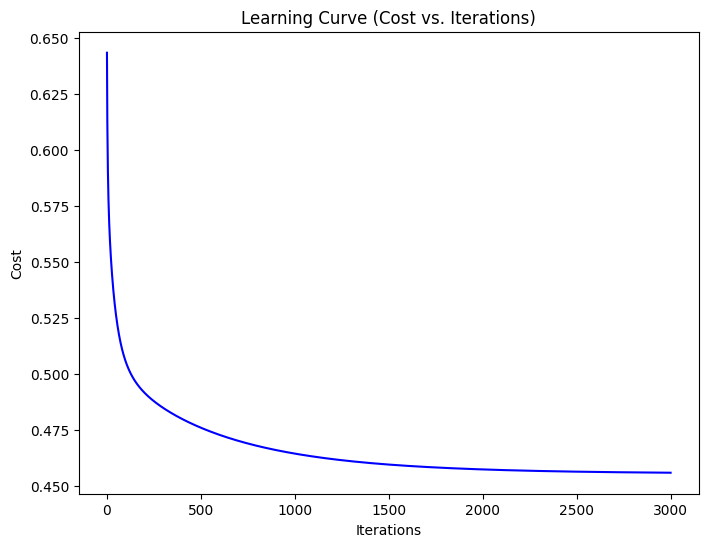

In [459]:
# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), cost_history, color='b')
plt.title("Learning Curve (Cost vs. Iterations)")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

Step 12: Testing the learning curve

- Performed better at alpha = 0.2 than at 0.1 with improvement in number of iterations required.
- Significant improvement in confusion matrix 
- Performance improved at alpha = 0.3 but decreased at 0.4
- so, alpha = 0.3
- number of iterations at 

Accuracy: 84.36%
Precision: 0.84
Recall: 0.64
F1 Score: 0.73
Log Loss: 0.4261


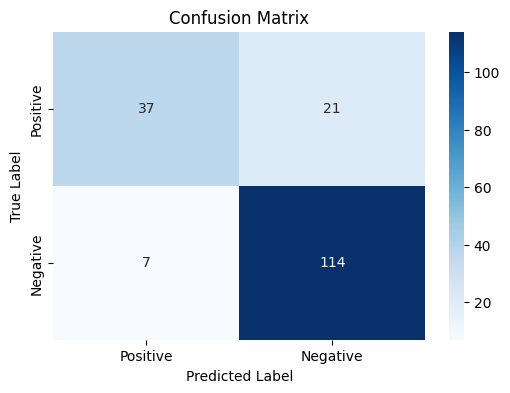

In [460]:
# Prediction function
def predict(x, weights, threshold=0.5):
    return (sigmoid(np.dot(x, weights)) >= threshold).astype(int)

# Evaluate the model on test data
y_pred = predict(x_test, weights)

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Log loss calculation
    eps = 1e-15  # Avoid log(0)
    y_pred_probs = sigmoid(np.dot(x_test, weights))  # Probabilities for log loss
    y_pred_probs = np.clip(y_pred_probs, eps, 1 - eps)  # Clip probabilities
    log_loss_value = -np.mean(y_true * np.log(y_pred_probs) + (1 - y_true) * np.log(1 - y_pred_probs))

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1_score:.2f}")
    print(f"Log Loss: {log_loss_value:.4f}")

    # Confusion matrix values
    confusion_matrix = np.array([[tp, fn], [fp, tn]])

    # Labels for the axes
    labels = ['Positive', 'Negative']

    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    return accuracy, f1_score, log_loss_value

# Calculate and print metrics on the test set
accuracy, f1_score, log_loss_value = calculate_metrics(y_test, y_pred)